<a href="https://colab.research.google.com/github/Shantanu9326/Data-Science-Portfolio/blob/master/Miles_Travelled_using_ARIMA_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forecasting Exercises - Solutions
This exercise walks through a SARIMA prediction and forecast similar to the one done on the Mauna Loa CO₂ dataset.<br>
This time we're using a seasonal time series of California Hospitality Industry Employees.

<div class="alert alert-danger" style="margin: 10px"><strong>IMPORTANT NOTE!</strong> Make sure you don't run the cells directly above the example output shown, <br>otherwise you will end up writing over the example output!</div>

In [0]:
#Running or Importing .py Files with Google Colab
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
pip install pyramid-arima

In [0]:
# RUN THIS CELL
import pandas as pd
import numpy as np
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pyramid.arima import auto_arima                             # for determining ARIMA orders

# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Load datasets
df = pd.read_csv('/content/drive/My Drive/app/Miles_Traveled.csv',index_col='DATE',parse_dates=True)
df.index.freq = 'MS'
print(len(df))
print(df.head())

588
            TRFVOLUSM227NFWA
DATE                        
1970-01-01           80173.0
1970-02-01           77442.0
1970-03-01           90223.0
1970-04-01           89956.0
1970-05-01           97972.0


In [0]:
df.columns = ['Value']

In [0]:
df.head()

,Value
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


So <tt>df</tt> has 348 records and one column. The data represents the number of employees in thousands of persons as monthly averages from January, 1990 to December 2018.

### 1. Plot the source data
Create a line chart of the dataset. Optional: add a title and y-axis label.

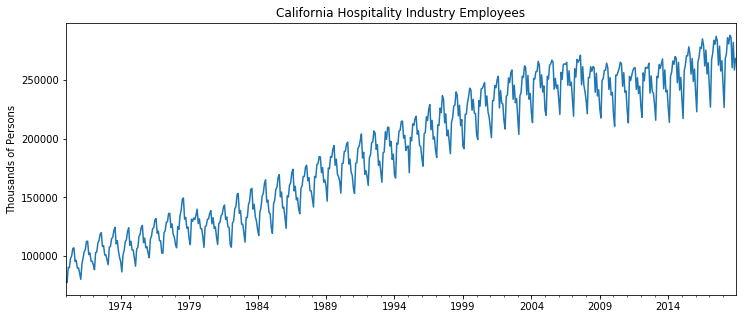

In [0]:
# DON'T WRITE HERE
title='California Hospitality Industry Employees'
ylabel='Thousands of Persons'
xlabel='' # we don't really need a label here

ax = df['Value'].plot(figsize=(12,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

### 2. Run an ETS Decomposition
Use an 'additive' model.

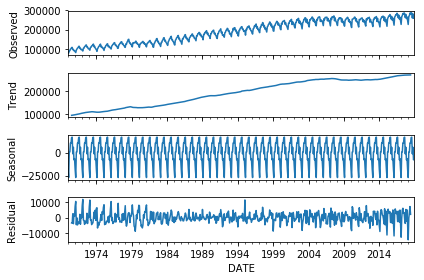

In [0]:
# DON'T WRITE HERE
result = seasonal_decompose(df['Value'], model='add')
result.plot();

### 3. Run <tt>pmdarima.auto_arima</tt> to obtain recommended orders
This may take awhile as there are a lot of combinations to evaluate.

In [0]:
# DON'T WRITE HERE
auto_arima(df['Value'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  588
Model:             SARIMAX(2, 1, 0)x(1, 0, 0, 12)   Log Likelihood               -5793.596
Date:                            Thu, 25 Jul 2019   AIC                          11597.193
Time:                                    04:24:05   BIC                          11619.068
Sample:                                         0   HQIC                         11605.717
                                            - 588                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     74.0563    162.153      0.457      0.648    -243.757     391.870
ar.L1         -0.3936      0.011    -35.473      0.000      -0.415      -0.372
ar.L2         -0.1711      0.018     -9.759      0.000      -0.205      -0.137
ar.S.L12       0.9309      0.006    156.483      0.000       0.919       0.943
sigma2      1.979e+07      0.006   3.36e+09      0.000    1.98e+07    1.98e+07
===================================================================================
Ljung-Box (Q):                       46.85   Jarque-Bera (JB):            240420.95
Prob(Q):                              0.21   Prob(JB):                         0.00
Heteroskedasticity (H):               0.30   Skew:                            -6.67
Prob(H) (two-sided):                  0.00   Kurtosis:                       101.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.73e+24. Standard errors may be unstable.
"""

You should see a recommended ARIMA Order of (0,1,0) combined with a seasonal order of (2,0,0,12).
### 4. Split the data into train/test sets
Set one year (12 records) for testing. There is more than one way to do this!

In [0]:
# DON'T WRITE HERE
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:]

### 5. Fit a SARIMA(0,1,0)(2,0,0,12) model to the training set

In [0]:
# DON'T WRITE HERE
model = SARIMAX(train['Value'],order=(2,1,0),seasonal_order=(1,0,0,12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Value   No. Observations:                  576
Model:             SARIMAX(2, 1, 0)x(1, 0, 0, 12)   Log Likelihood               -5677.840
Date:                            Thu, 25 Jul 2019   AIC                          11363.679
Time:                                    04:25:24   BIC                          11381.097
Sample:                                01-01-1970   HQIC                         11370.472
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4027      0.012    -33.946      0.000      -0.426      -0.379
ar.L2         -0.1559      0.020     -7.657      0.000      -0.196      -0.116
ar.S.L12       0.9128      0.005    172.954      0.000       0.902       0.923
sigma2      2.076e+07   8.42e-11   2.47e+17      0.000    2.08e+07    2.08e+07
===================================================================================
Ljung-Box (Q):                       50.45   Jarque-Bera (JB):            192258.47
Prob(Q):                              0.12   Prob(JB):                         0.00
Heteroskedasticity (H):               0.31   Skew:                            -6.22
Prob(H) (two-sided):                  0.00   Kurtosis:                        91.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.1e+32. Standard errors may be unstable.
"""

### 6. Obtain predicted values

In [0]:
# DON'T WRITE HERE
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(0,1,0)(2,0,0,12) Predictions')

### 7. Plot predictions against known values
Optional: add a title and y-axis label.

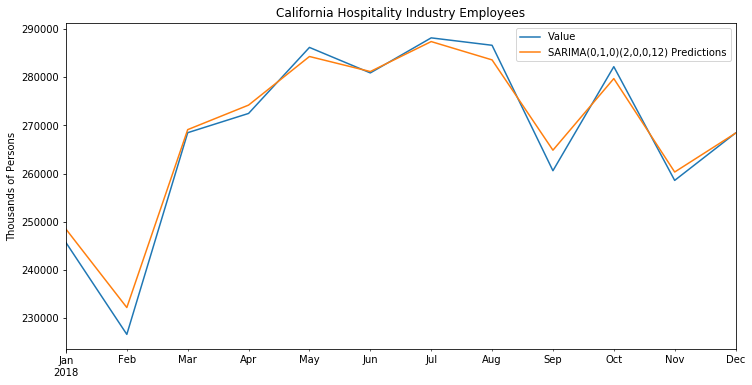

In [0]:
# DON'T WRITE HERE
title='California Hospitality Industry Employees'
ylabel='Thousands of Persons'
xlabel=''

ax = test['Value'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

### 8. Evaluate the Model using MSE and RMSE
You can run both from the same cell if you want.

In [0]:
# DON'T WRITE HERE
error1 = mean_squared_error(test['Value'], predictions)
error2 = rmse(test['Value'], predictions)
print(f'SARIMA(0,1,0)(2,0,0,12) MSE Error: {error1:11.10}')
print(f'SARIMA(0,1,0)(2,0,0,12) RMSE Error: {error2:11.10}')

SARIMA(0,1,0)(2,0,0,12) MSE Error: 6900681.431
SARIMA(0,1,0)(2,0,0,12) RMSE Error: 2626.914812


### 9. Retrain the model on the full data and forecast one year into the future

In [0]:
# DON'T WRITE HERE
model = SARIMAX(df['Value'],order=(0,1,0),seasonal_order=(2,0,0,12))
results = model.fit()
fcast = results.predict(len(df),len(df)+11,typ='levels').rename('SARIMA(0,1,0)(2,0,0,12) Forecast')

### 10. Plot the forecasted values alongside the original data
Optional: add a title and y-axis label.

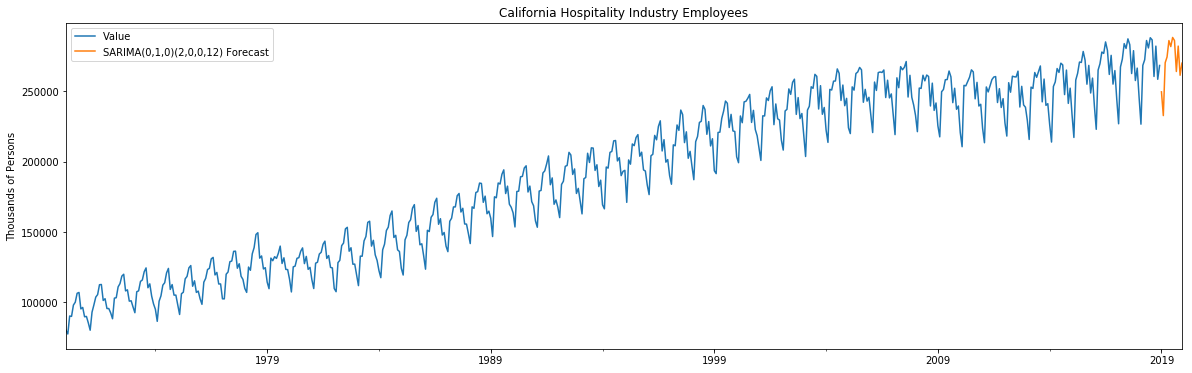

In [0]:
# DON'T WRITE HERE
title='California Hospitality Industry Employees'
ylabel='Thousands of Persons'
xlabel=''

ax = df['Value'].plot(legend=True,figsize=(20,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

## Great job!